In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Sample data
data = np.array([1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 0.85, 1.07, 1.48, 1.20, 1.33, 1.18, 1.22, 1.29])


In [3]:
# Sample statistics
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)

In [4]:
# Degrees of freedom and t-score for 99% confidence interval
df = n - 1
t_score = stats.t.ppf(0.995, df)

In [5]:
# Confidence interval using sample standard deviation
margin_of_error_sample_std = t_score * (sample_std / np.sqrt(n))
ci_sample_std = (sample_mean - margin_of_error_sample_std, sample_mean + margin_of_error_sample_std)


In [6]:
# Known population standard deviation
population_std = 0.2
z_score = stats.norm.ppf(0.995)

In [7]:
# Confidence interval using population standard deviation
margin_of_error_population_std = z_score * (population_std / np.sqrt(n))
ci_population_std = (sample_mean - margin_of_error_population_std, sample_mean + margin_of_error_population_std)


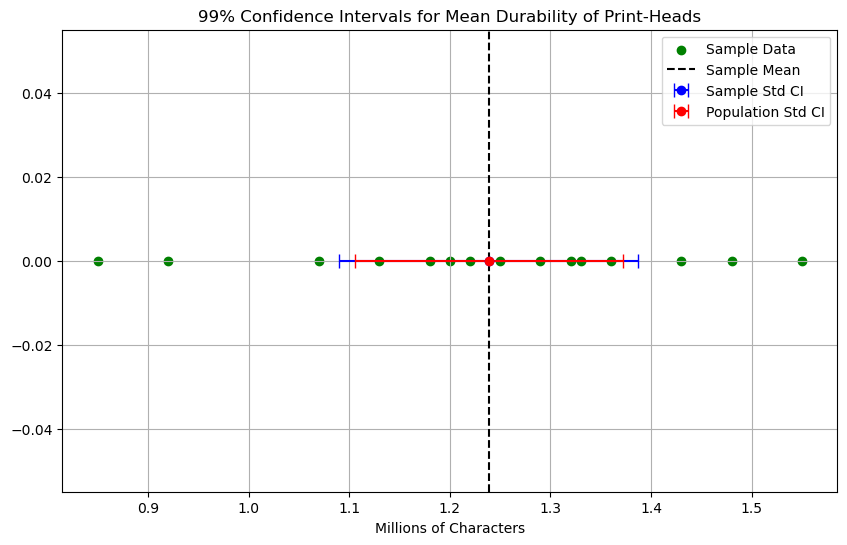

In [8]:
# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(sample_mean, 0, xerr=margin_of_error_sample_std, fmt='o', label='Sample Std CI', color='blue', capsize=5)
plt.errorbar(sample_mean, 0, xerr=margin_of_error_population_std, fmt='o', label='Population Std CI', color='red', capsize=5)
plt.scatter(data, np.zeros_like(data), color='green', label='Sample Data')
plt.axvline(sample_mean, color='black', linestyle='--', label='Sample Mean')
plt.title('99% Confidence Intervals for Mean Durability of Print-Heads')
plt.xlabel('Millions of Characters')
plt.legend()
plt.grid(True)
plt.show()